# Missing Value Handling

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

from sklearn import linear_model

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# Data Preparation

In [7]:
#load iris data from sklearn into dataframe
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                        columns= iris['feature_names'] + ['target'])
df

                    


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
#add some missing values
df.iloc[53:59, 0] = np.nan
df.iloc[3:105, 2] = np.nan
df.iloc[4:6, 3] = np.nan
df.iloc[35:37, 1:5] = np.nan

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,NaN,0.2,0.0
4,5.0,3.6,NaN,NaN,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
#add a feature with no collinear relationship to other features
df['random'] = np.random.random(size=len(df))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,random
0,5.1,3.5,1.4,0.2,0.0,0.872458
1,4.9,3.0,1.4,0.2,0.0,0.557034
2,4.7,3.2,1.3,0.2,0.0,0.875865
3,4.6,3.1,NaN,0.2,0.0,0.925024
4,5.0,3.6,NaN,NaN,0.0,0.904095
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,0.652631
146,6.3,2.5,5.0,1.9,2.0,0.707889
147,6.5,3.0,5.2,2.0,2.0,0.652655
148,6.2,3.4,5.4,2.3,2.0,0.754774


In [10]:
#add missing values to random feature
df.iloc[2:4, 5] = np.nan
df.iloc[103:105, 5] = np.nan
df.iloc[4:6, 5] = np.nan
df.iloc[35:37, 5] = np.nan


# Data Exploration

In [11]:
#show descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,random
count,144.000000,148.000000,48.000000,146.000000,148.000000,142.000000
mean,5.840278,3.053378,5.277083,1.225342,1.013514,0.487060
std,0.835934,0.437123,1.160198,0.755834,0.816384,0.269822
min,4.300000,2.000000,1.300000,0.100000,0.000000,0.001993
25%,5.100000,2.800000,5.075000,0.300000,0.000000,0.254839
50%,5.800000,3.000000,5.450000,1.300000,1.000000,0.495305
75%,6.400000,3.300000,5.800000,1.800000,2.000000,0.679055
max,7.900000,4.400000,6.900000,2.500000,2.000000,0.991337


In [12]:
#count missing values
df.isnull().sum()


sepal length (cm)      6
sepal width (cm)       2
petal length (cm)    102
petal width (cm)       4
target                 2
random                 8
dtype: int64

<Axes: >

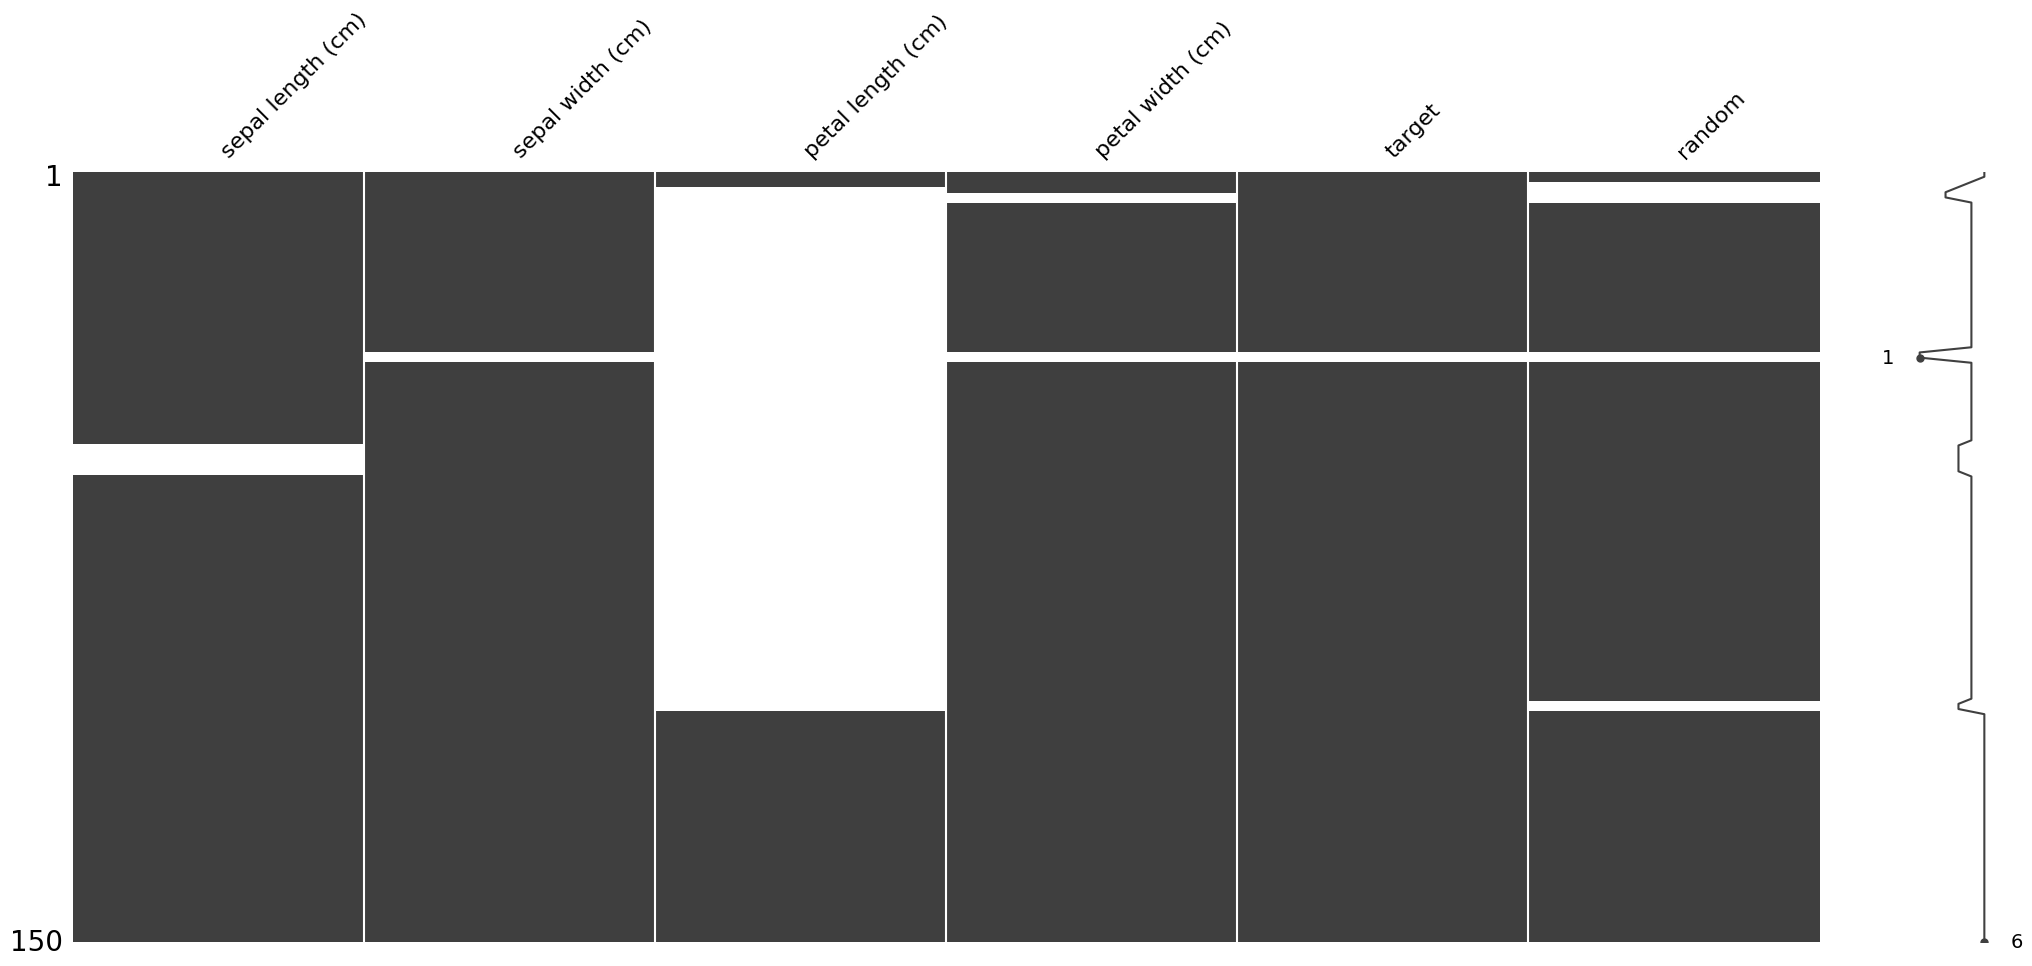

In [13]:
#visualize missing values
msno.matrix(df)

# Test Regression Model on raw data

In [14]:
#Test building a regression model on data with MV
#Linear Regression: Baseline model
reg = linear_model.LinearRegression()

feature_list=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

features=df[feature_list]
label=df['target']

In [15]:
#train regression model
reg.fit(features,label)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

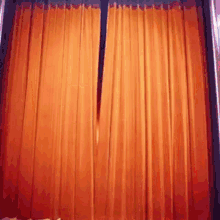

In [12]:
#Show rows in which label is NaN
df[df['target'].isnull()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,random
35,5.0,NaN,NaN,NaN,NaN,NaN
36,5.5,NaN,NaN,NaN,NaN,NaN


In [13]:
#show rows with more than two columns with missing values
df[df.isnull().sum(axis=1)>2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,random
4,5.0,3.6,NaN,NaN,0.0,NaN
5,5.4,3.9,NaN,NaN,0.0,NaN
35,5.0,NaN,NaN,NaN,NaN,NaN
36,5.5,NaN,NaN,NaN,NaN,NaN


# Missing Value Handling - Listwise Deletion

Deletion of entire row of data. If a row contains a lot of missing values and/or label is a missing.

In [14]:
#Listwise deletion (if label is missing))
df=df.drop(df[df['target'].isnull()].index)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,random
0,5.1,3.5,1.4,0.2,0.0,0.758052
1,4.9,3.0,1.4,0.2,0.0,0.374877
2,4.7,3.2,1.3,0.2,0.0,NaN
3,4.6,3.1,NaN,0.2,0.0,NaN
4,5.0,3.6,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,0.999683
146,6.3,2.5,5.0,1.9,2.0,0.376111
147,6.5,3.0,5.2,2.0,2.0,0.244586
148,6.2,3.4,5.4,2.3,2.0,0.052602


In [15]:
#Listwise deletion (all rows with multiple missing values)
df=df.drop(df[df.isnull().sum(axis=1)>2].index)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,random
0,5.1,3.5,1.4,0.2,0.0,0.758052
1,4.9,3.0,1.4,0.2,0.0,0.374877
2,4.7,3.2,1.3,0.2,0.0,NaN
3,4.6,3.1,NaN,0.2,0.0,NaN
6,4.6,3.4,NaN,0.3,0.0,0.726974
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,0.999683
146,6.3,2.5,5.0,1.9,2.0,0.376111
147,6.5,3.0,5.2,2.0,2.0,0.244586
148,6.2,3.4,5.4,2.3,2.0,0.052602


In [16]:
#show rows with more than two columns with missing values
df[df.isnull().sum(axis=1)>2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,random


<Axes: >

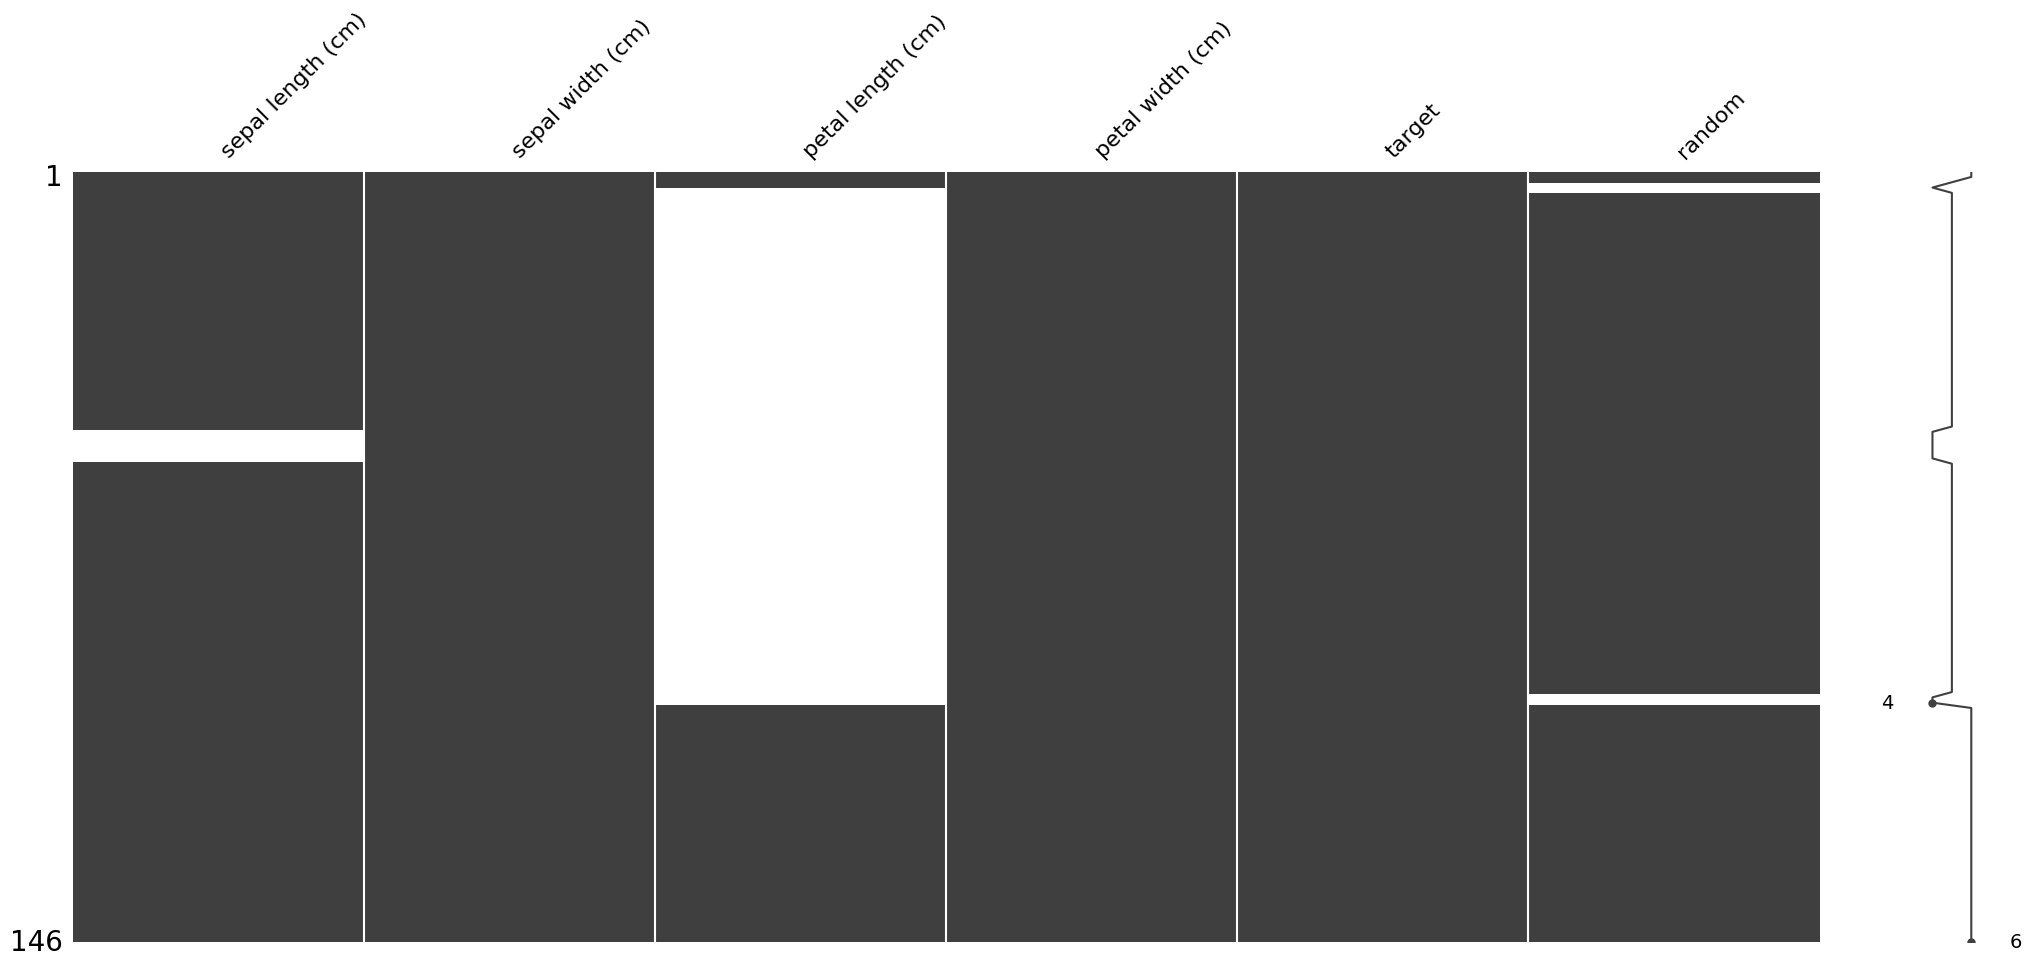

In [17]:
msno.matrix(df)

# Missing Value Handling - Feature Deletion

In [18]:
#Delete feature petal length (cm) due to large number of missing values
df=df.drop('petal length (cm)',axis=1)
df


,sepal length (cm),sepal width (cm),petal width (cm),target,random
0,5.1,3.5,0.2,0.0,0.758052
1,4.9,3.0,0.2,0.0,0.374877
2,4.7,3.2,0.2,0.0,NaN
3,4.6,3.1,0.2,0.0,NaN
6,4.6,3.4,0.3,0.0,0.726974
...,...,...,...,...,...
145,6.7,3.0,2.3,2.0,0.999683
146,6.3,2.5,1.9,2.0,0.376111
147,6.5,3.0,2.0,2.0,0.244586
148,6.2,3.4,2.3,2.0,0.052602


<Axes: >

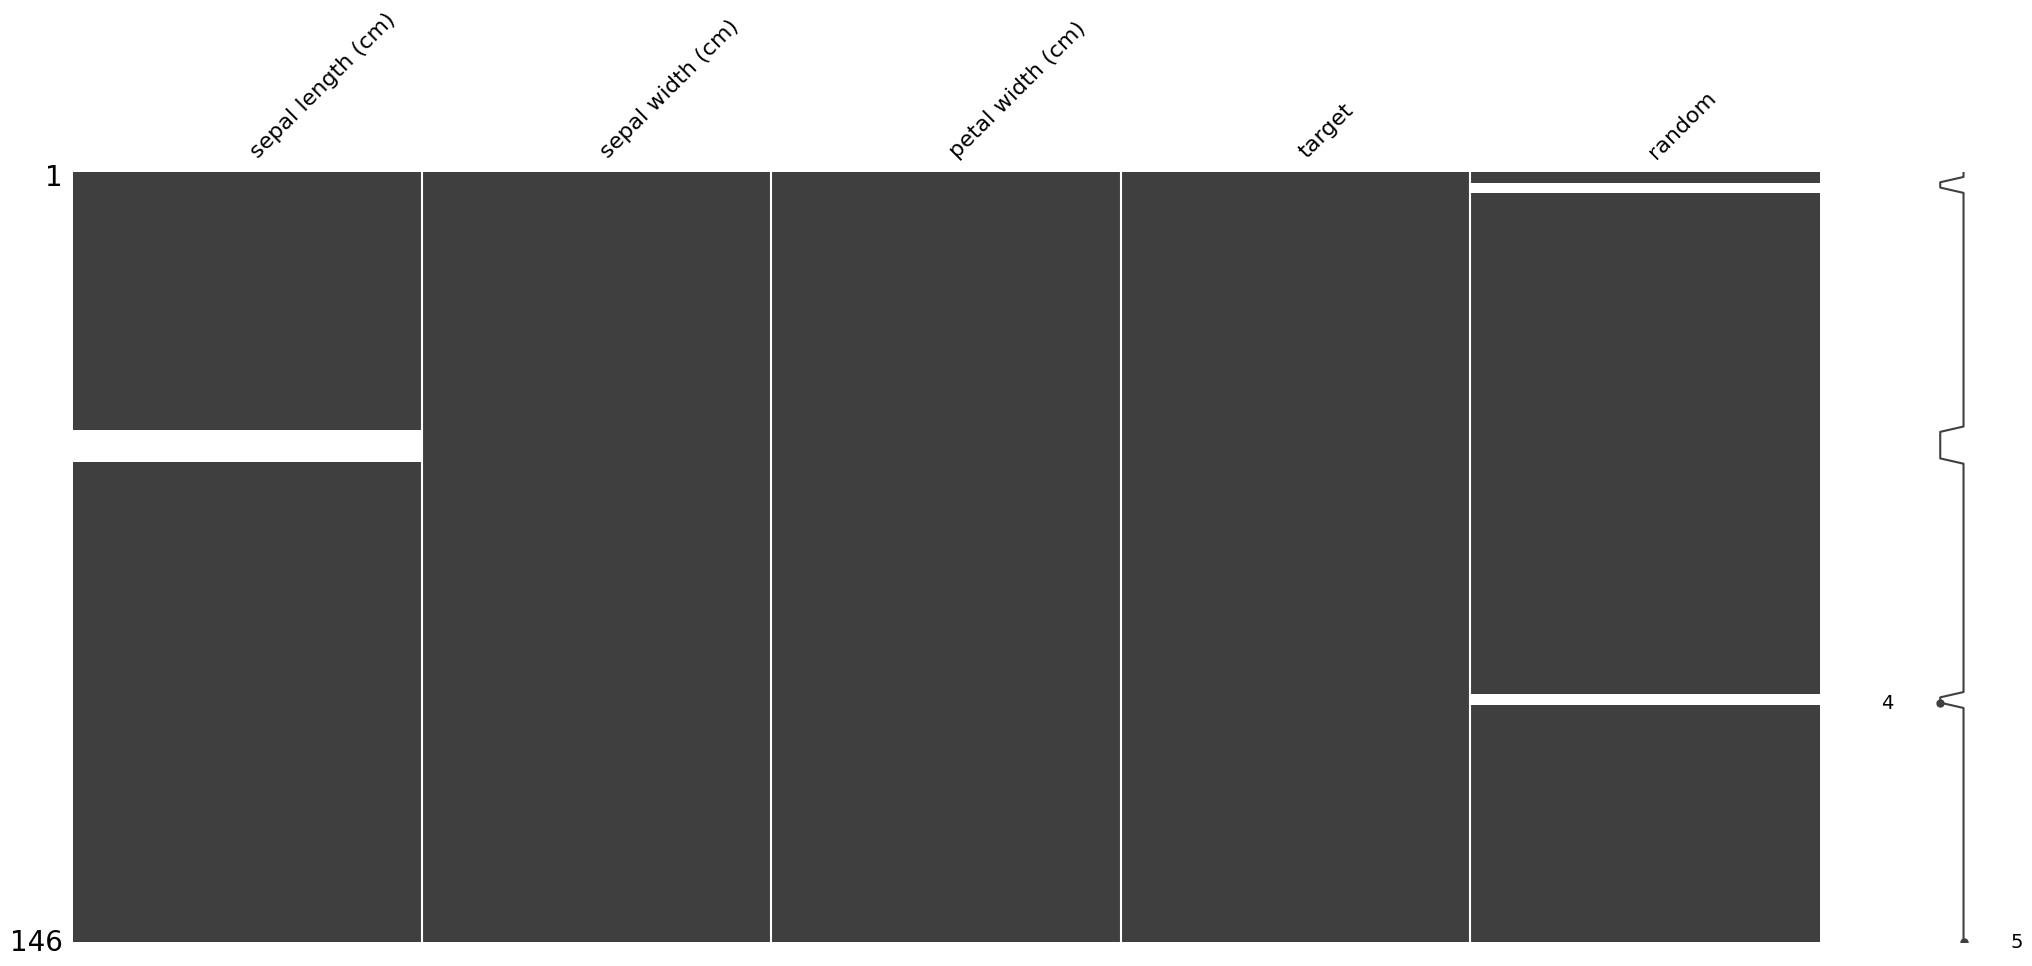

In [19]:
msno.matrix(df)

<Axes: >

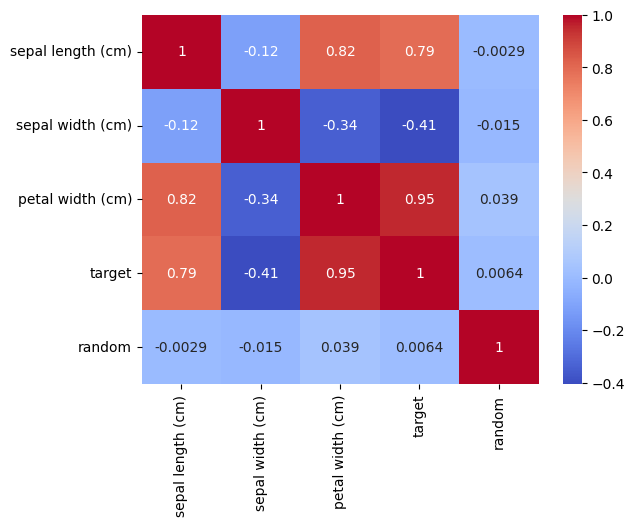

In [20]:
#calculate correlation matrix and visualize with coolwarm color map
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)


# Missing Value Handling - Average Imputation

If a feature shall be used for prediction, is not collinear and does not show systematic missings (MAR, NMAR)

The feature "random" should not show correlations / collinerarity to other features

In [41]:
# displaying examples with missing values in feature "random"
random_MV= df[df['random'].isnull()]
random_MV

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,random
2,4.7,3.2,1.3,0.2,0.0,NaN
3,4.6,3.1,NaN,0.2,0.0,NaN
4,5.0,3.6,NaN,NaN,0.0,NaN
5,5.4,3.9,NaN,NaN,0.0,NaN
35,5.0,NaN,NaN,NaN,NaN,NaN
36,5.5,NaN,NaN,NaN,NaN,NaN
103,6.3,2.9,NaN,1.8,2.0,NaN
104,6.5,3.0,NaN,2.2,2.0,NaN


In [42]:
#replace missing values in feature "random" with mean
imputer = SimpleImputer(strategy='mean')
df['random'] = imputer.fit_transform(df[['random']])

# displaying examples with missing values in feature "random"
random_MV= df[df['random'].isnull()]
random_MV

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,random


<Axes: >

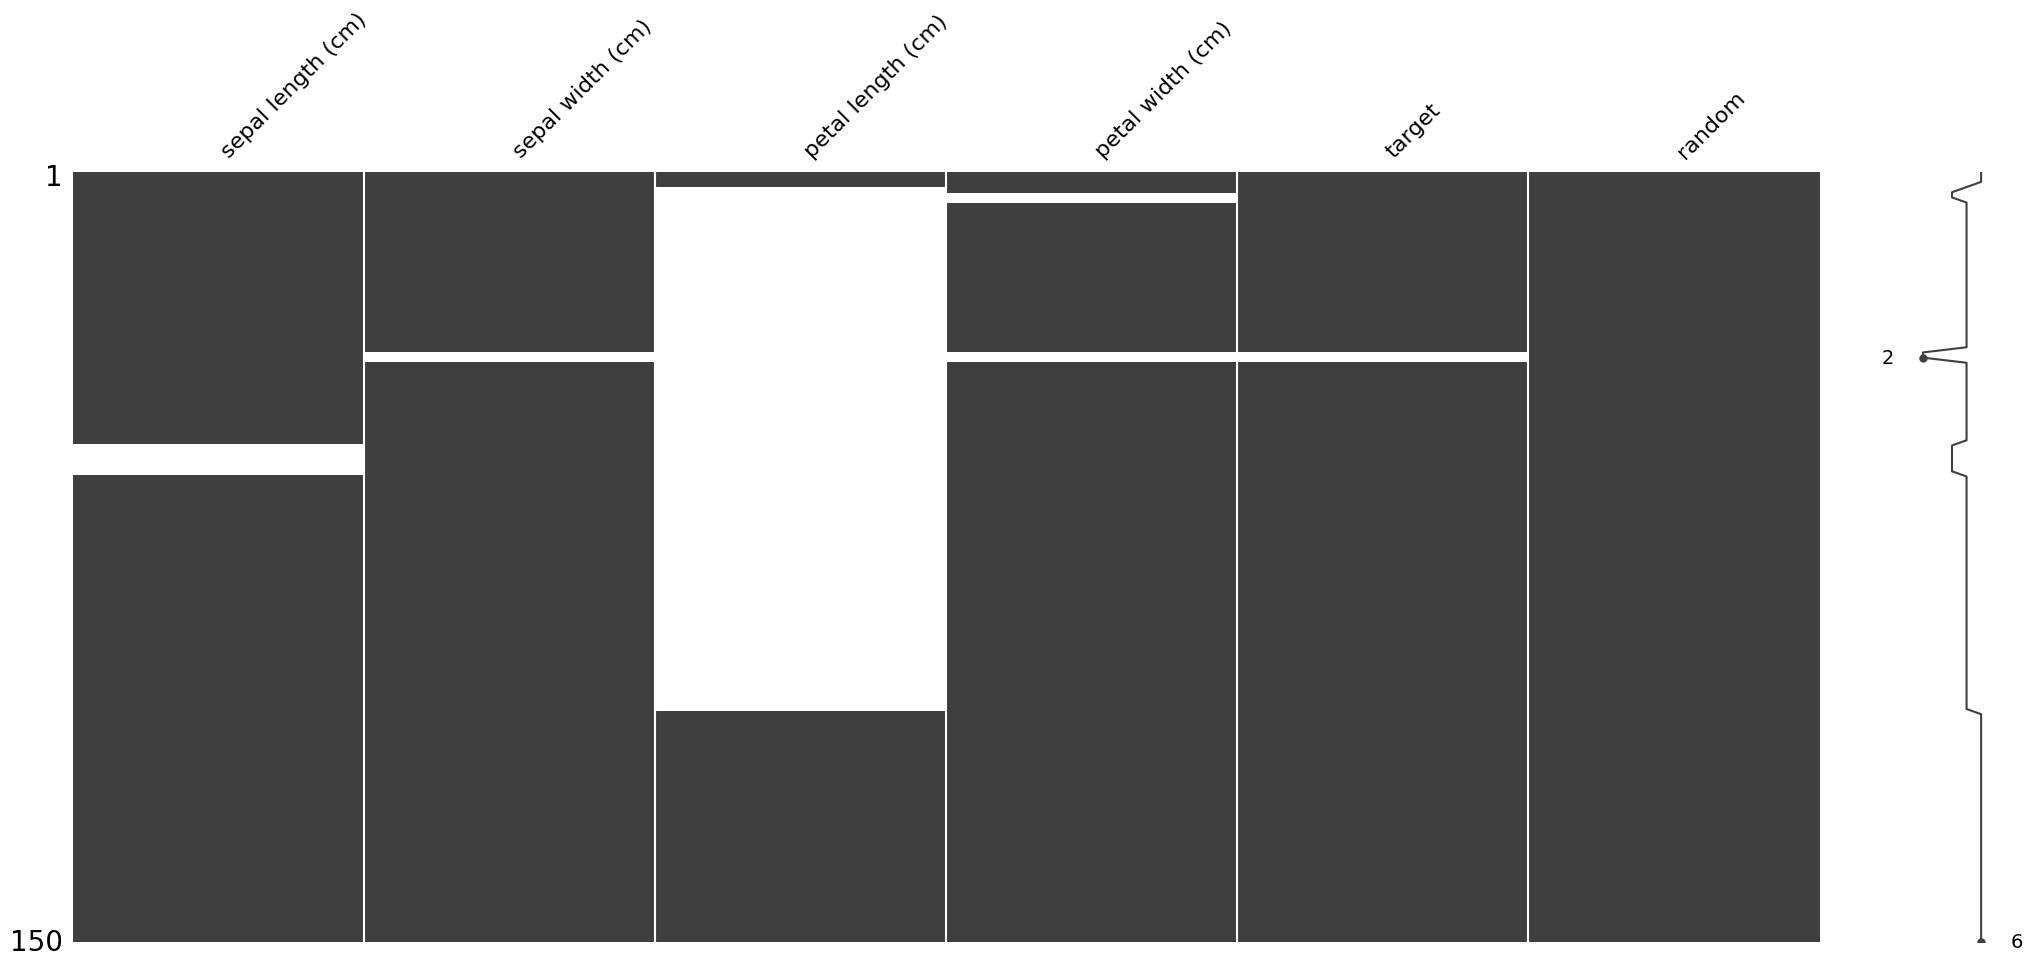

In [43]:
msno.matrix(df)

# Missing Value Handling - Regression Imputation

<Axes: >

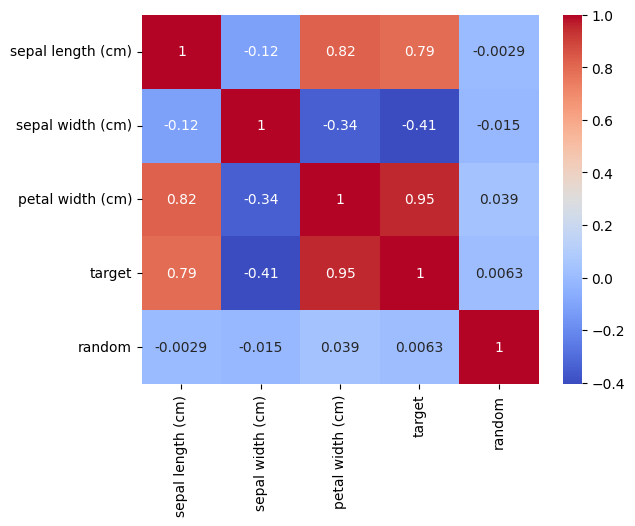

In [25]:
#calculate correlation matrix and visualize with coolwarm color map
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)

In [26]:
#Use colinearity to impute missing values for feature "sepal length (cm)" with feature "petal width (cm)"
#train regression model, only use rows without missing values
reg = linear_model.LinearRegression()
#store ids of rows without missing values in feature "sepal length (cm)"
ids = df[df['sepal length (cm)'].notnull()].index.values
#train regression model
reg.fit(df.loc[ids, ['petal width (cm)']], df.loc[ids, 'sepal length (cm)'])
#show rows with missing values in feature "sepal length (cm)"
df[df['sepal length (cm)'].isnull()]


,sepal length (cm),sepal width (cm),petal width (cm),target,random
53,NaN,2.3,1.3,1.0,0.759492
54,NaN,2.8,1.5,1.0,0.242858
55,NaN,2.8,1.3,1.0,0.067052
56,NaN,3.3,1.6,1.0,0.721003
57,NaN,2.4,1.0,1.0,0.293260
58,NaN,2.9,1.3,1.0,0.947416


In [27]:
#predict missing values using regression model trained on petal width (cm)
df.loc[~df.index.isin(ids), 'sepal length (cm)'] = reg.predict(df.loc[~df.index.isin(ids), ['petal width (cm)']])

In [28]:
#show rows with imputed values
df.loc[~df.index.isin(ids)]

,sepal length (cm),sepal width (cm),petal width (cm),target,random
53,5.928837,2.3,1.3,1.0,0.759492
54,6.107886,2.8,1.5,1.0,0.242858
55,5.928837,2.8,1.3,1.0,0.067052
56,6.197410,3.3,1.6,1.0,0.721003
57,5.660264,2.4,1.0,1.0,0.293260
58,5.928837,2.9,1.3,1.0,0.947416


<Axes: >

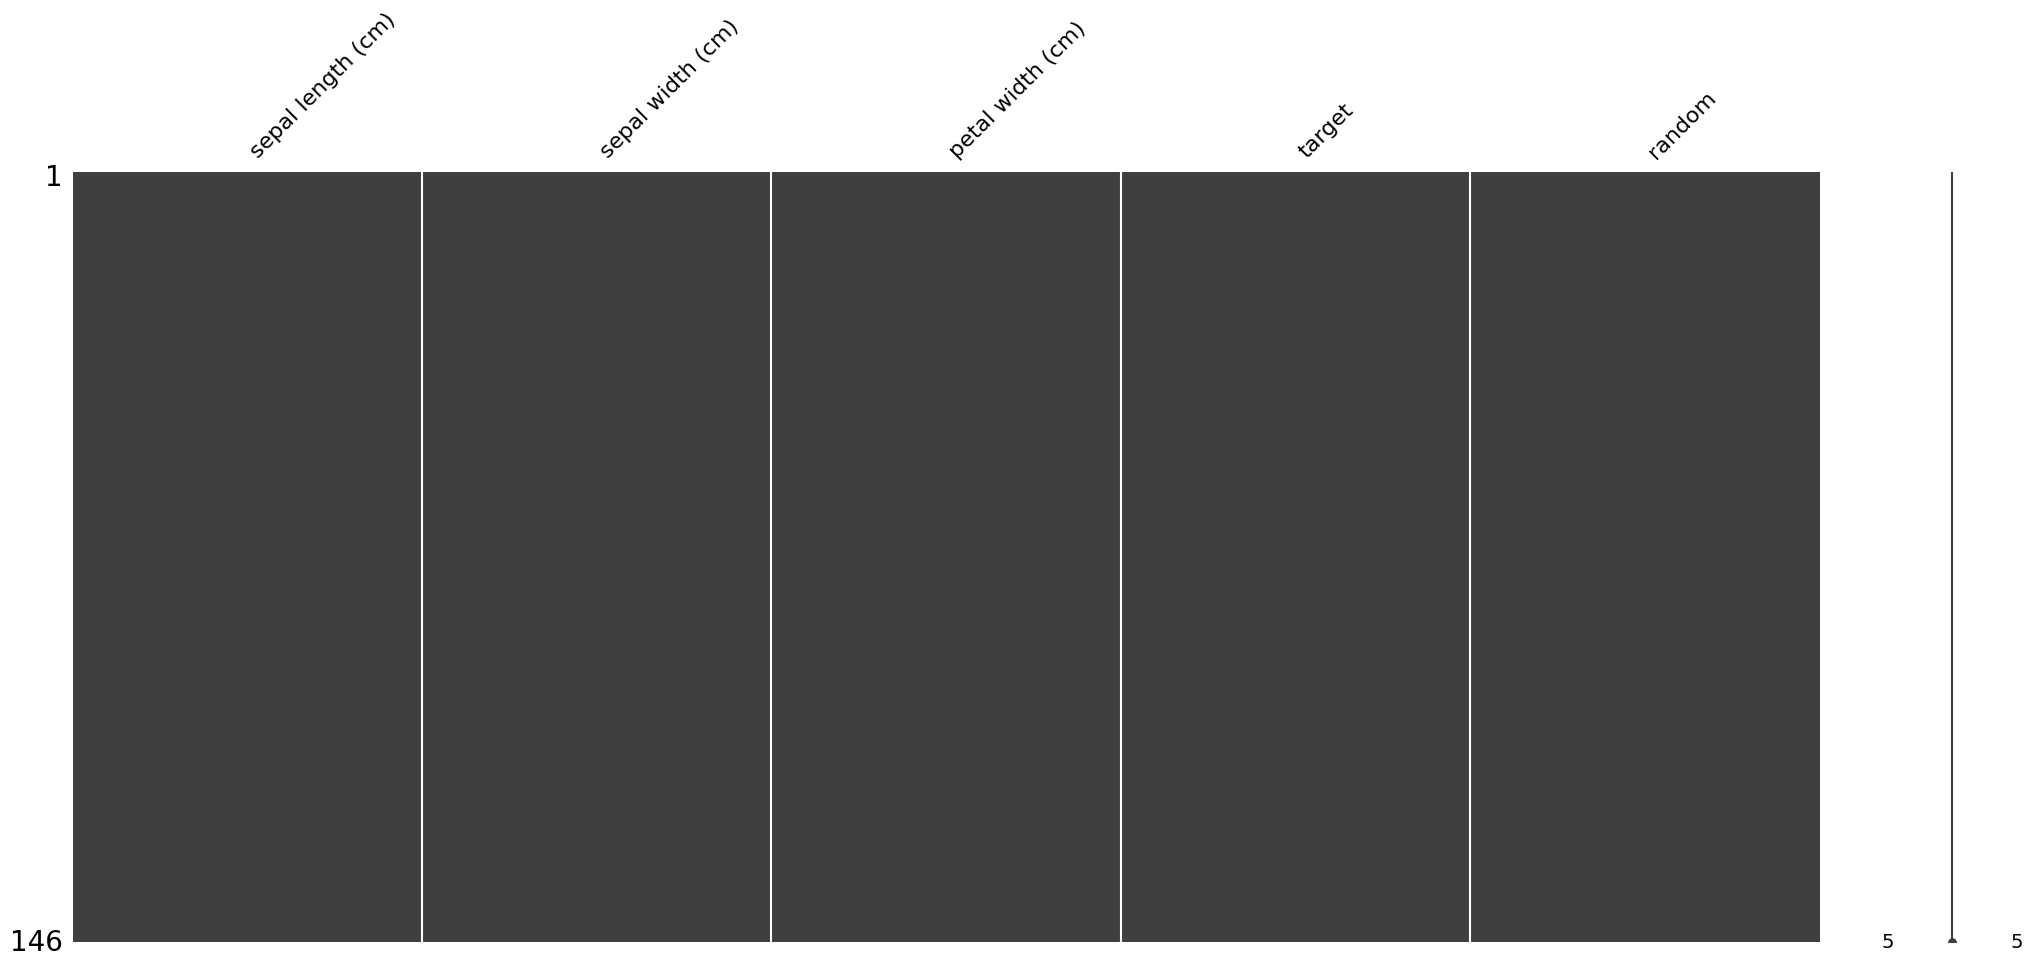

In [29]:
msno.matrix(df)